In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
traveltime = pd.read_csv(r'datasets/ACS_15_5YR_S0801_bymetro/ACS_15_5YR_S0801.csv',
                    header=0,sep=",")
population = pd.read_csv(r'datasets/DEC_10_SF1_GCTPH1.US24PR/census2010populationdensity.csv',\
                        header=0, encoding='latin-1')
modeofcommute = pd.read_csv(r'datasets/ACS_15_5YR_S0801_bymetro/ACS_15_5YR_S0801_with_ann.csv',\
                           header=0)

In [3]:
merged = traveltime.merge(population, left_on="GEO.display-label", right_on="GCT_STUB.display-label.1")
merged["Mean Travel Time"] = (merged["HC01_EST_VC46"]*7 + merged["HC01_EST_VC47"]*12 + merged["HC01_EST_VC48"]*17\
+ merged["HC01_EST_VC49"]*22 + merged["HC01_EST_VC50"]*27 + merged["HC01_EST_VC51"]*32 + merged["HC01_EST_VC52"]*40 +\
merged["HC01_EST_VC53"]*52 + merged["HC01_EST_VC54"]*60)/100
merged = merged.merge(modeofcommute, left_on="GEO.display-label_x", right_on="GEO.display-label")
merged.head()

,GEO.id_x,GEO.id2_x,GEO.display-label_x,HC01_EST_VC01_x,HC01_MOE_VC01_x,HC02_EST_VC01_x,HC02_MOE_VC01_x,HC03_EST_VC01_x,HC03_MOE_VC01_x,HC01_EST_VC03_x,...,HC02_EST_VC69_y,HC02_MOE_VC69_y,HC03_EST_VC69_y,HC03_MOE_VC69_y,HC01_EST_VC70_y,HC01_MOE_VC70_y,HC02_EST_VC70_y,HC02_MOE_VC70_y,HC03_EST_VC70_y,HC03_MOE_VC70_y
0,310M200US10180,10180,"Abilene, TX Metro Area",72827,2659,38393,2538,34434,792,93.1,...,(X),(X),(X),(X),0.7,(X),(X),(X),(X),(X)
1,310M200US10420,10420,"Akron, OH Metro Area",332619,2222,171612,1502,161007,1590,92.8,...,(X),(X),(X),(X),0.7,(X),(X),(X),(X),(X)
2,310M200US10500,10500,"Albany, GA Metro Area",59147,1214,29018,866,30129,846,92.7,...,(X),(X),(X),(X),1.6,(X),(X),(X),(X),(X)
3,310M200US10580,10580,"Albany-Schenectady-Troy, NY Metro Area",430433,2584,222574,1899,207859,1778,88.0,...,(X),(X),(X),(X),1.2,(X),(X),(X),(X),(X)
4,310M200US10740,10740,"Albuquerque, NM Metro Area",395799,3225,207589,1894,188210,2360,89.5,...,(X),(X),(X),(X),1.0,(X),(X),(X),(X),(X)


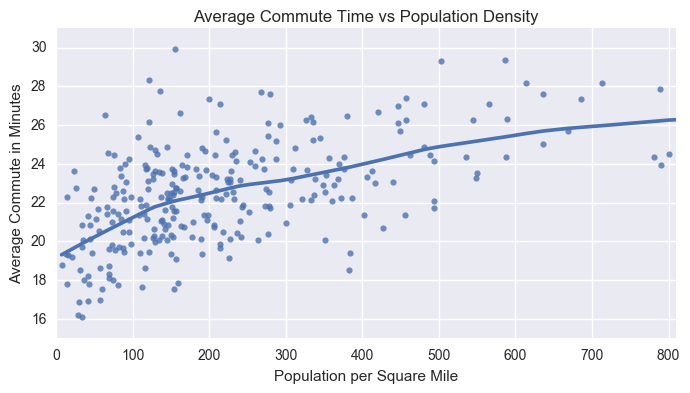

In [4]:
g = sns.regplot(x="SUBHD0401", y="Mean Travel Time", data=merged, lowess=True) #, scatter_kws={"s":merged["Car%"]*25000}
g.figure.set_size_inches(8,4)
g.set(xlim=(0, 810)) 
g.set(ylim=(15,31))
g.set(xlabel=("Population per Square Mile"),ylabel=("Average Commute in Minutes"))
g.set(title="Average Commute Time vs Population Density")
plt.savefig("Population vs Commute.pdf")
plt.show()